In [1]:
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import numpy as np


In [3]:
# read the csv file from csv_files/job_postings.csv
df = pd.read_csv('csv_files/job_postings.csv')

# print the shape of the dataframe
print(df.shape)

# show the first 5 rows
df.head()

(661, 28)


,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,4142381204,12618960.0,Software Engineer - ML/LLM Inference,My client is searching for a talented engineer...,NaN,NaN,NaN,NaN,Full-time,"San Francisco, CA",...,NaN,Mid-Senior level,NaN,1758140008000,NaN,0,FULL_TIME,NaN,NaN,1758147825
1,4143424503,17900793.0,"ML Compiler Engineer, Compute",Waymo is an autonomous driving technology comp...,216000.0,NaN,170000.0,YEARLY,Full-time,"New York, NY",...,NaN,Entry level,NaN,1758135414000,careers.withwaymo.com,0,FULL_TIME,USD,BASE_SALARY,1758136173
2,4194268398,3859.0,"Lead, Data Engineering",WebMD is the most recognized and trusted brand...,160000.0,NaN,144000.0,YEARLY,Full-time,"Boise, ID",...,NaN,Mid-Senior level,NaN,1758134615000,NaN,0,FULL_TIME,USD,BASE_SALARY,1758135956
3,4223664485,64638.0,Software Engineering Instructor (Continuous),"ABOUT PER SCHOLAS:\n\nFor 30 years, Per Schola...",75000.0,NaN,65000.0,YEARLY,Full-time,"Columbus, OH",...,NaN,Mid-Senior level,NaN,1758142855000,job-boards.greenhouse.io,0,FULL_TIME,USD,BASE_SALARY,1758147160
4,4233098265,1419.0,Senior Data Engineer (Bank Tech),Do you love building and pioneering in the tec...,NaN,NaN,NaN,NaN,Full-time,"McLean, VA",...,NaN,Mid-Senior level,NaN,1758141053000,dsp.prng.co,0,FULL_TIME,NaN,NaN,1758147382


In [4]:
df[df['work_type'] == 'PART_TIME']

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
48,4299662769,104085107.0,Mid Software Engineer,Dice is the leading career destination for tec...,158000.0,NaN,69400.0,YEARLY,Part-time,"Herndon, VA",...,NaN,Entry level,NaN,1758135389000,click.appcast.io,0,PART_TIME,USD,BASE_SALARY,1758138276
340,4301979045,105220004.0,Artificial Intelligence Intern,The primary responsibility for this position w...,NaN,NaN,NaN,NaN,Part-time,"Phoenix, AZ",...,NaN,NaN,NaN,1758141088000,NaN,0,PART_TIME,NaN,NaN,1758147677
387,4302042927,5192530.0,SQL Developer and Power BI Analyst,Lensa is a career site that helps job seekers ...,80000.0,NaN,40001.0,YEARLY,Part-time,United States,...,NaN,Entry level,NaN,1758141754000,lensa.com,0,PART_TIME,USD,BASE_SALARY,1758147825
396,4302043935,81911898.0,ETDP Intern - Data Analytics,Company \n\nenGen\n\nJob Description \n\nNotic...,NaN,NaN,NaN,NaN,Part-time,"Pittsburgh, PA",...,NaN,Internship,NaN,1758134691000,highmarkhealth.wd1.myworkdayjobs.com,0,PART_TIME,NaN,NaN,1758136245
404,4302044821,5192530.0,Power Platform Developer Part Time (Remote),Lensa is a career site that helps job seekers ...,90.0,NaN,80.0,HOURLY,Part-time,"Atlanta, GA",...,NaN,Entry level,NaN,1758141769000,lensa.com,0,PART_TIME,USD,BASE_SALARY,1758147825
414,4302045739,5192530.0,ServiceNow Platform Administrator,Lensa is a career site that helps job seekers ...,153649.0,NaN,110240.0,YEARLY,Part-time,United States,...,NaN,Entry level,NaN,1758141768000,lensa.com,0,PART_TIME,USD,BASE_SALARY,1758147160
436,4302048678,5192530.0,Cache/IRIS Software Engineer,Lensa is a career site that helps job seekers ...,125000.0,NaN,100000.0,YEARLY,Part-time,United States,...,NaN,Entry level,NaN,1758141755000,lensa.com,0,PART_TIME,USD,BASE_SALARY,1758148265
450,4302050564,5192530.0,Power Platform Developer Part Time (Remote),Lensa is a career site that helps job seekers ...,90.0,NaN,80.0,HOURLY,Part-time,"Denver, CO",...,NaN,Entry level,NaN,1758141768000,lensa.com,0,PART_TIME,USD,BASE_SALARY,1758147603
510,4302056372,5192530.0,Front End Developer - Specialist,Lensa is a career site that helps job seekers ...,126996.0,NaN,91104.0,YEARLY,Part-time,United States,...,NaN,Entry level,NaN,1758141760000,lensa.com,0,PART_TIME,USD,BASE_SALARY,1758147751
513,4302057287,5192530.0,Power Platform Developer Part Time (Remote),Lensa is a career site that helps job seekers ...,90.0,NaN,80.0,HOURLY,Part-time,"Boston, MA",...,NaN,Entry level,NaN,1758141776000,lensa.com,0,PART_TIME,USD,BASE_SALARY,1758147677


In [5]:
# Convert hourly salary to annual salary assuming 40/20 hours per week and 52 weeks per year
df.loc[(df['work_type'] != 'PART_TIME') & (df['pay_period'] == 'HOURLY'), 'min_salary'] *= 40 * 52
df.loc[(df['work_type'] != 'PART_TIME') & (df['pay_period'] == 'HOURLY'), 'max_salary'] *= 40 * 52
df.loc[(df['work_type'] != 'PART_TIME') & (df['pay_period'] == 'HOURLY'), 'med_salary'] *= 40 * 52
df.loc[(df['work_type'] == 'PART_TIME') & (df['pay_period'] == 'HOURLY'), 'min_salary'] *= 20 * 52
df.loc[(df['work_type'] == 'PART_TIME') & (df['pay_period'] == 'HOURLY'), 'max_salary'] *= 20 * 52
df.loc[(df['work_type'] == 'PART_TIME') & (df['pay_period'] == 'HOURLY'), 'med_salary'] *= 20 * 52
df.loc[df['pay_period'] == 'HOURLY', 'pay_period'] = 'YEARLY'

# Convert min_salary and max_salary to med_salary if med_salary is null
df.loc[df['med_salary'].isnull(), 'med_salary'] = (df['min_salary'] + df['max_salary']) / 2

In [6]:
# show shape for rows where min_salary, max_salary, or med_salary is not null
df[(df['min_salary'].notnull()) | (df['max_salary'].notnull()) | (df['med_salary'].notnull())]

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
1,4143424503,17900793.0,"ML Compiler Engineer, Compute",Waymo is an autonomous driving technology comp...,216000.0,193000.0,170000.0,YEARLY,Full-time,"New York, NY",...,NaN,Entry level,NaN,1758135414000,careers.withwaymo.com,0,FULL_TIME,USD,BASE_SALARY,1758136173
2,4194268398,3859.0,"Lead, Data Engineering",WebMD is the most recognized and trusted brand...,160000.0,152000.0,144000.0,YEARLY,Full-time,"Boise, ID",...,NaN,Mid-Senior level,NaN,1758134615000,NaN,0,FULL_TIME,USD,BASE_SALARY,1758135956
3,4223664485,64638.0,Software Engineering Instructor (Continuous),"ABOUT PER SCHOLAS:\n\nFor 30 years, Per Schola...",75000.0,70000.0,65000.0,YEARLY,Full-time,"Columbus, OH",...,NaN,Mid-Senior level,NaN,1758142855000,job-boards.greenhouse.io,0,FULL_TIME,USD,BASE_SALARY,1758147160
14,4249873930,25299.0,Data Governance Scientist,Amalgamated Bank is seeking a Data Governance/...,170000.0,162500.0,155000.0,YEARLY,Full-time,"New York, NY",...,NaN,Entry level,NaN,1758135148000,workforcenow.adp.com,0,FULL_TIME,USD,BASE_SALARY,1758135884
15,4255162502,19769.0,Senior Data Engineer,OverviewAt New York Blood Center Enterprises (...,150000.0,137500.0,125000.0,YEARLY,Full-time,"Rye, NY",...,NaN,Mid-Senior level,NaN,1758133516000,NaN,0,FULL_TIME,USD,BASE_SALARY,1758136390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,4302089136,78397379.0,Software Engineer - Data Focused,Mochi Health’s mission is to be the discovery ...,200000.0,170000.0,140000.0,YEARLY,Full-time,"San Francisco, CA",...,NaN,Entry level,NaN,1758141947000,www.adzuna.com,0,FULL_TIME,USD,BASE_SALARY,1758147899
648,4302089282,NaN,Sr Lead Power BI Specialist,This will be a hybrid position where you shoul...,115000.0,107500.0,100000.0,YEARLY,Full-time,"Bridgewater, NJ",...,NaN,Mid-Senior level,NaN,1758143183000,NaN,0,FULL_TIME,USD,BASE_SALARY,1758147603
655,4302093203,79376776.0,Rapid Application Developer,The Global Markets Pre-Trade IT team is respon...,180000.0,147500.0,115000.0,YEARLY,Full-time,"New York, NY",...,NaN,Mid-Senior level,NaN,1758144467000,NaN,0,FULL_TIME,USD,BASE_SALARY,1758147234
657,4302094029,41294.0,Data Science Manager – Operations Intelligence,We are seeking a forward-thinking hands-on Dat...,175000.0,162500.0,150000.0,YEARLY,Full-time,"New York, NY",...,NaN,Mid-Senior level,NaN,1758143431000,NaN,0,FULL_TIME,USD,BASE_SALARY,1758147603


In [7]:
df['pay_period'].value_counts()

pay_period
YEARLY    293
Name: count, dtype: int64

In [8]:
df[df['pay_period'] == 'HOURLY']

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped


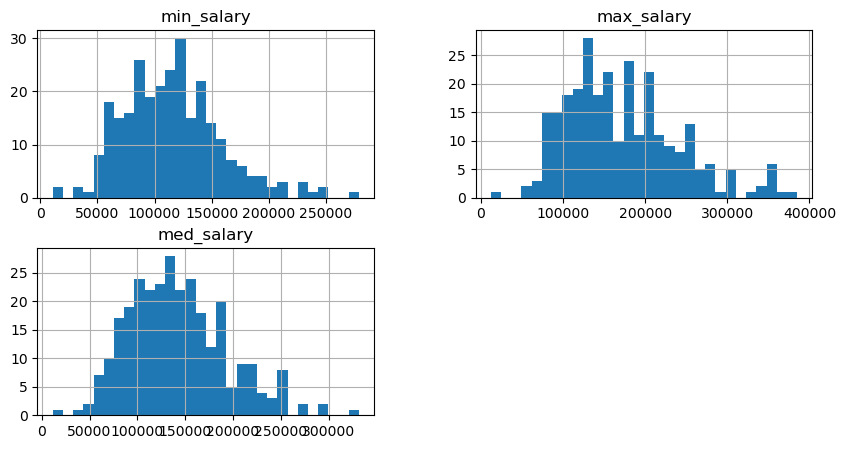

In [9]:
salary_df = df[(df['min_salary'].notnull()) | (df['max_salary'].notnull()) | (df['med_salary'].notnull())]

# Visualize the distribution of min_salary, max_salary, and med_salary using histograms
salary_df.describe()
salary_df.hist(column=['min_salary', 'max_salary', 'med_salary'], bins=30, figsize=(10, 5))
plt.show()

In [10]:
salary_df['work_type'].value_counts()

work_type
FULL_TIME     253
CONTRACT       17
PART_TIME      14
INTERNSHIP      8
TEMPORARY       1
Name: count, dtype: int64

In [11]:
# show the count of pay_period
salary_df['pay_period'].value_counts()


pay_period
YEARLY    293
Name: count, dtype: int64

In [12]:
salary_df['formatted_experience_level'].value_counts()

formatted_experience_level
Mid-Senior level    124
Entry level         102
Associate            19
Internship            7
Director              4
Executive             1
Name: count, dtype: int64

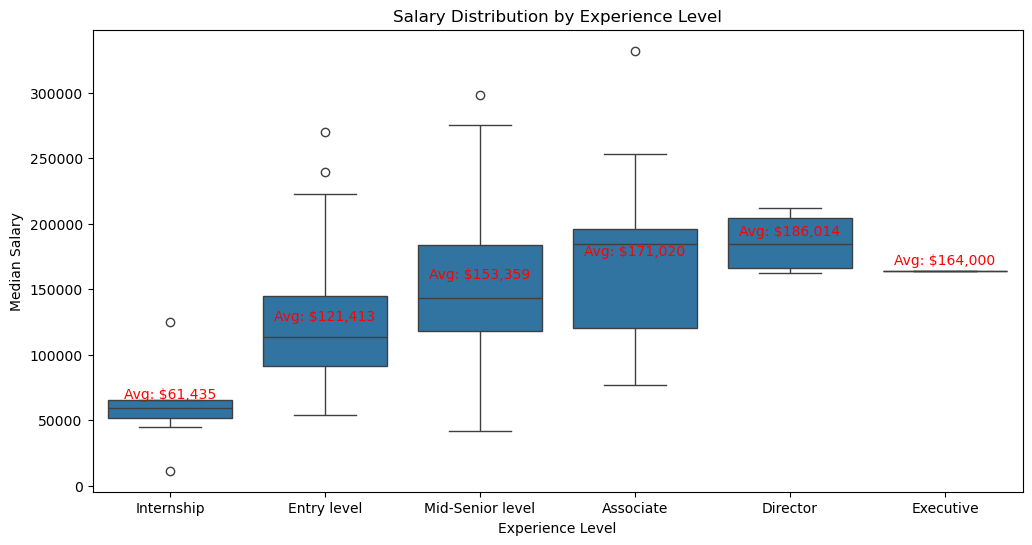

In [13]:
# visualize the distribution of salary by formatted_experience_level, in order of 'internship', 'entry_level', 'associate', 'mid_senior_level', 'director', 'executive'

plt.figure(figsize=(12, 6))
sns.boxplot(x='formatted_experience_level', y='med_salary', data=salary_df, order=['Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')

# add annotations for the average salary of IQR 2 + 3 for each experience level
experience_levels = ['Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive']
for level in experience_levels:
    avg_salary = salary_df[salary_df['formatted_experience_level'] == level]['med_salary'].mean()
    plt.text(experience_levels.index(level), avg_salary + 5000, f'Avg: ${avg_salary:,.0f}', horizontalalignment='center', color='red')

plt.show()

In [14]:
salary_df.describe()

,job_id,company_id,max_salary,med_salary,min_salary,applies,original_listed_time,remote_allowed,views,expiry,closed_time,listed_time,sponsored,scraped
count,2.930000e+02,2.920000e+02,277.000000,293.000000,277.000000,241.000000,2.930000e+02,99.0,284.000000,2.930000e+02,2.000000e+00,2.930000e+02,293.0,2.930000e+02
mean,4.299311e+09,1.588070e+07,172153.353466,142209.791502,115384.118809,51.232365,1.757747e+12,1.0,143.014085,1.760964e+12,1.758139e+12,1.758140e+12,0.0,1.758144e+09
std,1.347535e+07,3.068400e+07,69042.835912,52056.909827,42931.750811,143.553663,1.861885e+09,0.0,420.032482,1.469691e+09,4.564374e+06,3.516522e+06,0.0,5.186057e+03
min,4.143425e+09,1.028000e+03,12030.000000,11520.000000,11010.000000,1.000000,1.738680e+12,1.0,1.000000,1.759352e+12,1.758136e+12,1.758133e+12,0.0,1.758136e+09
25%,4.301955e+09,5.521000e+03,120000.000000,106080.000000,85000.000000,4.000000,1.758134e+12,1.0,12.000000,1.760727e+12,1.758137e+12,1.758135e+12,0.0,1.758136e+09
50%,4.302033e+09,2.469643e+06,160000.000000,135200.000000,111605.000000,9.000000,1.758134e+12,1.0,31.000000,1.760734e+12,1.758139e+12,1.758141e+12,0.0,1.758148e+09
75%,4.302057e+09,1.097326e+07,209296.000000,172500.000000,140000.000000,33.000000,1.758141e+12,1.0,83.000000,1.760734e+12,1.758140e+12,1.758142e+12,0.0,1.758148e+09
max,4.302095e+09,1.078062e+08,385000.000000,332000.000000,279000.000000,1381.000000,1.758146e+12,1.0,3716.000000,1.773694e+12,1.758142e+12,1.758147e+12,0.0,1.758148e+09


In [15]:
# Count unique values in title
df['title'].value_counts()


title
Software Engineer                                            17
Data Scientist                                               11
Data Engineer                                                10
Machine Learning Engineer                                     8
Senior Software Engineer                                      8
                                                             ..
Datastage Senior Technical Lead                               1
Senior Data Analyst - Healthcare - ONSITE in Wauwatosa WI     1
Insight Analyst                                               1
Senior Data Modeler                                           1
Python Back-end Engineer                                      1
Name: count, Length: 534, dtype: int64

In [16]:
# Create a separate df for rows where title contains 'Data' or 'Analyist' or 'Scientist' or 'AI'
data_df = df[df['title'].str.contains('Data|Analyst|Scientist|AI', case=False, na=False)]

# Create a separate df for the rest of the rows
software_df = df[~df['title'].str.contains('Data|Analyst|Scientist|AI', case=False, na=False)]


In [17]:
pd.set_option('display.max_rows', None)
software_df['title'].value_counts()


title
Software Engineer                                                                                                                            17
Senior Software Engineer                                                                                                                      8
Machine Learning Engineer                                                                                                                     8
Software Developer - Entry Level                                                                                                              7
Developer                                                                                                                                     5
User Experience Design Manager                                                                                                                4
Power Platform Developer Part Time (Remote)                                                                                       

In [18]:
pd.reset_option('display.max_rows')

posx and posy should be finite values
posx and posy should be finite values


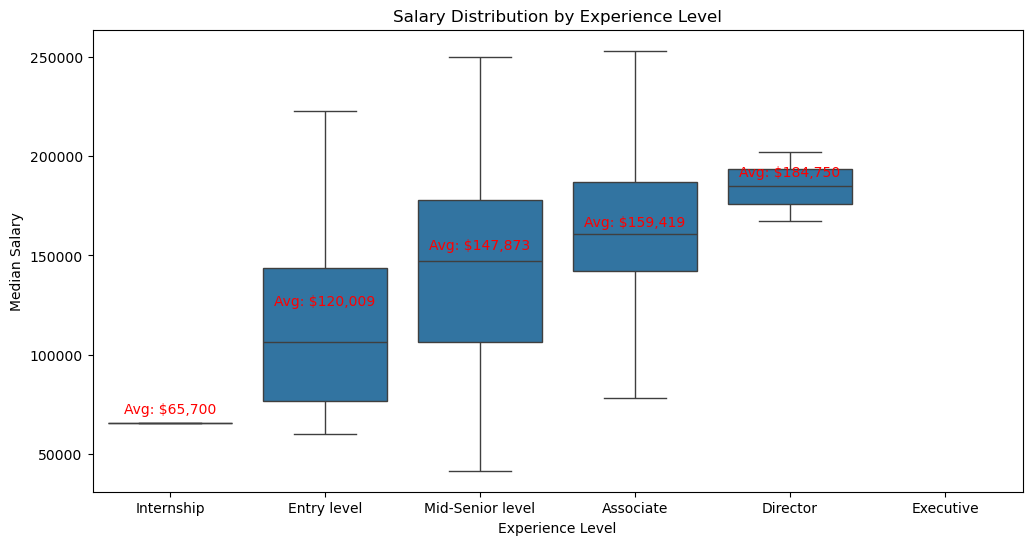

In [19]:
# visualize the data_df distribution of salary by formatted_experience_level, in order of 'internship', 'entry_level', 'associate', 'mid_senior_level', 'director', 'executive'

plt.figure(figsize=(12, 6))
sns.boxplot(x='formatted_experience_level', y='med_salary', data=data_df, order=['Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')

# add annotations for the average salary of IQR 2 + 3 for each experience level
experience_levels = ['Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive']
for level in experience_levels:
    avg_salary = data_df[data_df['formatted_experience_level'] == level]['med_salary'].mean()
    plt.text(experience_levels.index(level), avg_salary + 5000, f'Avg: ${avg_salary:,.0f}', horizontalalignment='center', color='red')

plt.show()

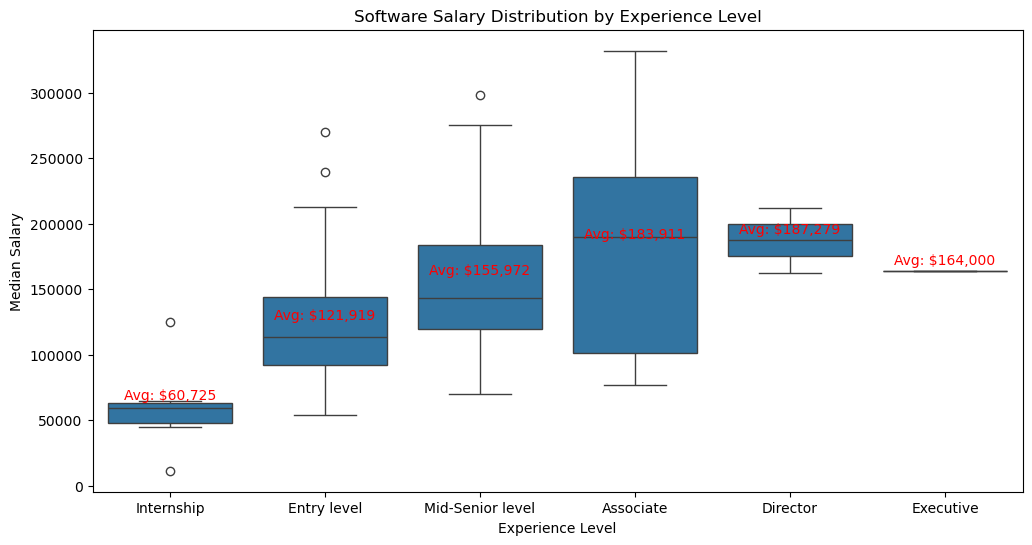

In [20]:
# visualize the software_df of distribution of salary by formatted_experience_level, in order of 'internship', 'entry_level', 'associate', 'mid_senior_level', 'director', 'executive'

plt.figure(figsize=(12, 6))
sns.boxplot(x='formatted_experience_level', y='med_salary', data=software_df, order=['Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive'])
plt.title('Software Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')

# add annotations for the average salary of IQR 2 + 3 for each experience level
experience_levels = ['Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive']
for level in experience_levels:
    avg_salary = software_df[software_df['formatted_experience_level'] == level]['med_salary'].mean()
    plt.text(experience_levels.index(level), avg_salary + 5000, f'Avg: ${avg_salary:,.0f}', horizontalalignment='center', color='red')

plt.show()

In [21]:
# visualize the software_df of distribution of salary by formatted_experience_level, in order of 'internship', 'entry_level', 'associate', 'mid_senior_level', 'director', 'executive' for UTAH

utah_software_df = software_df[software_df['location'].str.contains('UT', case=False, na=False)]

utah_software_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
505,4302056306,5192530.0,Software Engineering Intern (Summer 2026) (Ons...,Lensa is a career site that helps job seekers ...,82000.0,59500.0,37000.0,YEARLY,Internship,"West Valley City, UT",...,NaN,Internship,NaN,1758141774000,lensa.com,0,INTERNSHIP,USD,BASE_SALARY,1758147308
530,4302059295,5192530.0,Software Engineering Intern Summer 2026,Lensa is a career site that helps job seekers ...,NaN,NaN,NaN,NaN,Internship,"Salt Lake City, UT",...,NaN,Internship,NaN,1758141765000,lensa.com,0,INTERNSHIP,NaN,NaN,1758147677
590,4302073846,19717630.0,Requirements Engineer,Remote Work\n\nNo\n\nJob Number\n\nR0226417\n\...,198000.0,142400.0,86800.0,YEARLY,Part-time,"Clearfield, UT",...,NaN,Entry level,NaN,1758143024000,careers.boozallen.com,0,PART_TIME,USD,BASE_SALARY,1758148046
593,4302074836,354860.0,Full Stack Software Engineer,Position Overview\n\nWe are hiring a Full Stac...,NaN,NaN,NaN,NaN,Full-time,"Salt Lake City, UT",...,NaN,Entry level,NaN,1758142614000,recruiting.adp.com,0,FULL_TIME,NaN,NaN,1758147825
594,4302074837,354860.0,Full Stack Software Engineer,Position Overview\n\nWe are hiring a Full Stac...,NaN,NaN,NaN,NaN,Full-time,"Salt Lake City, UT",...,NaN,Entry level,NaN,1758142614000,recruiting.adp.com,0,FULL_TIME,NaN,NaN,1758147603


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


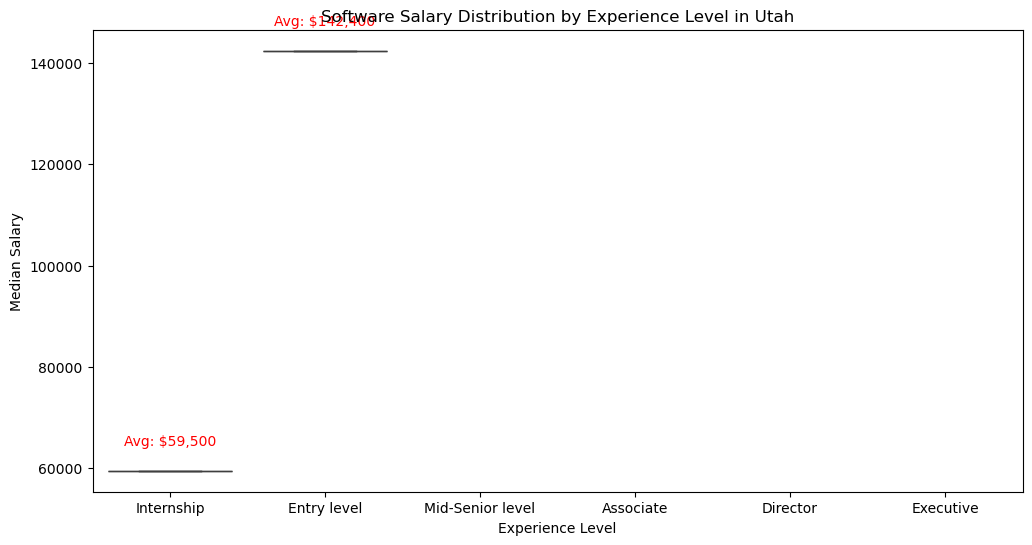

In [22]:


plt.figure(figsize=(12, 6))
sns.boxplot(x='formatted_experience_level', y='med_salary', data=utah_software_df, order=['Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive'])
plt.title('Software Salary Distribution by Experience Level in Utah')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')

# add annotations for the average salary of IQR 2 + 3 for each experience level
experience_levels = ['Internship', 'Entry level', 'Mid-Senior level', 'Associate', 'Director', 'Executive']
for level in experience_levels:
    avg_salary = utah_software_df[utah_software_df['formatted_experience_level'] == level]['med_salary'].mean()
    plt.text(experience_levels.index(level), avg_salary + 5000, f'Avg: ${avg_salary:,.0f}', horizontalalignment='center', color='red')

plt.show()

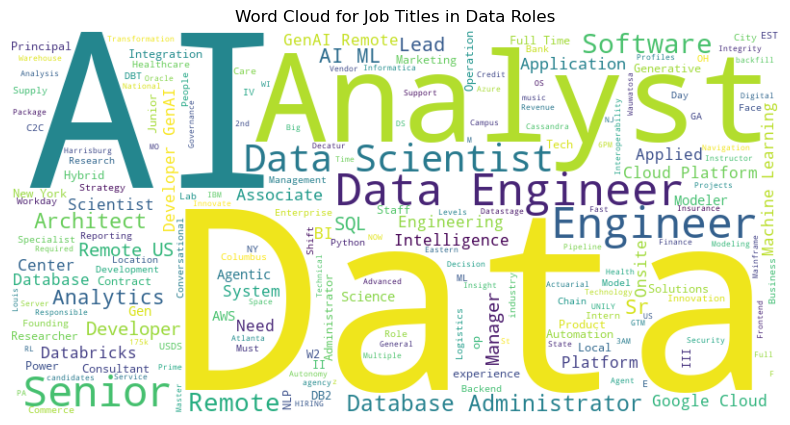

In [23]:
# Create a word cloud for job titles in data_df
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_df['title'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Titles in Data Roles')
plt.show()

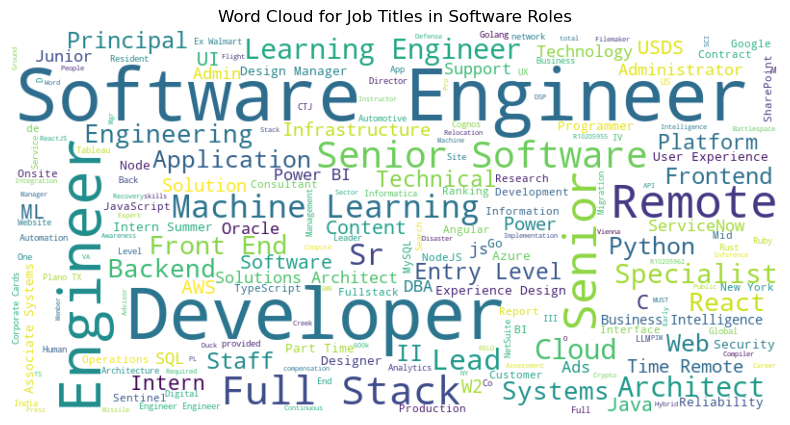

In [24]:
# Create a word cloud for job titles in software_df
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(software_df['title'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Titles in Software Roles')
plt.show()

In [25]:
# Print the size of data_df and software_df
print(f'data_df size: {data_df.shape}')
print(f'software_df size: {software_df.shape}')

data_df size: (238, 28)
software_df size: (423, 28)


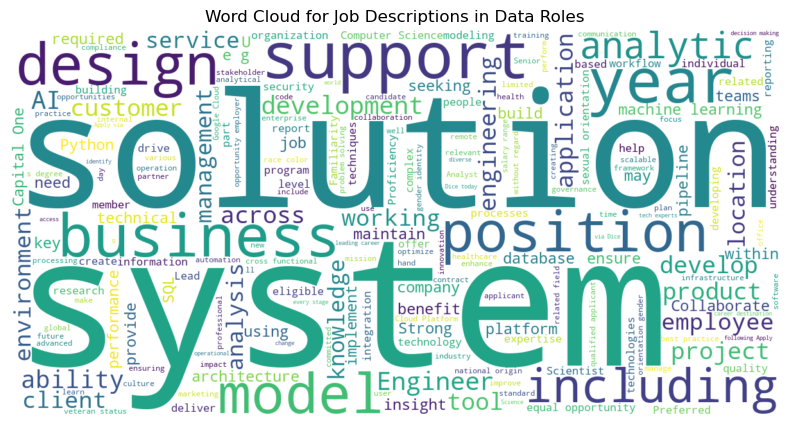

In [26]:
# Create a word cloud for job descriptions in data_df with a blacklist of common words to exclude
stopwords = set(STOPWORDS)
stopwords.update(['responsibilities', 'requirements', 'experience', 'data', 'role', 'work', 'team', 'skills', 'will'])

wordcloud = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords).generate(' '.join(data_df['description'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions in Data Roles')
plt.show()

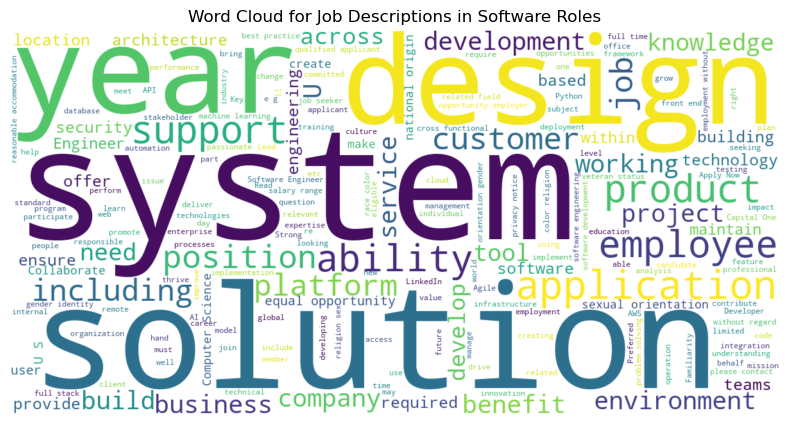

In [27]:
# Create a word cloud for job descriptions in software_df with a blacklist of common words to exclude
stopwords = set(STOPWORDS)
stopwords.update(['responsibilities', 'requirements', 'experience', 'data', 'role', 'work', 'team', 'skills', 'will'])

wordcloud = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords).generate(' '.join(software_df['description'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Descriptions in Software Roles')
plt.show()
